#**Analisis de sentimiento de los tweets relacionados con cada cluster**



# Preparación de colab

## Importamos librerías

In [22]:
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk import tokenize
import numpy as np

nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:

import pandas as pd
import re
import matplotlib.pyplot as plt

import os
from glob import glob
import unicodedata # Preprocesado
import csv



In [3]:
!pip install vaderSentiment

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
import seaborn as sns

## Conecto con drive

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
path_tweets='drive/My Drive/keepcoding/Tweets/tweets/'

# Importo tweets

In [7]:
files_cluster0 = [filename for filename in os.listdir(path_tweets+'/clusters') if filename.startswith("Cluster0")]
files_cluster1 = [filename for filename in os.listdir(path_tweets+'/clusters') if filename.startswith("Cluster1")]
files_cluster2 = [filename for filename in os.listdir(path_tweets+'/clusters') if filename.startswith("Cluster2")]
files_cluster3 = [filename for filename in os.listdir(path_tweets+'/clusters') if filename.startswith("Cluster3")]
files_cluster4 = [filename for filename in os.listdir(path_tweets+'/clusters') if filename.startswith("Cluster4")]

In [8]:
df_cluster0 = pd.concat((pd.read_csv(path_tweets+'/clusters/'+f) for f in files_cluster0), ignore_index=True).drop_duplicates()
df_cluster1 = pd.concat((pd.read_csv(path_tweets+'/clusters/'+f) for f in files_cluster1), ignore_index=True).drop_duplicates()
df_cluster2 = pd.concat((pd.read_csv(path_tweets+'/clusters/'+f) for f in files_cluster2), ignore_index=True).drop_duplicates()
df_cluster3 = pd.concat((pd.read_csv(path_tweets+'/clusters/'+f) for f in files_cluster3), ignore_index=True).drop_duplicates()
df_cluster4 = pd.concat((pd.read_csv(path_tweets+'/clusters/'+f) for f in files_cluster4), ignore_index=True).drop_duplicates()
list_df_clusters=['df_cluster0','df_cluster1','df_cluster2','df_cluster3','df_cluster4']

In [9]:
print(f'Tengo {len(df_cluster0)} en el Cluster 0')
print(f'Tengo {len(df_cluster1)} en el Cluster 1')
print(f'Tengo {len(df_cluster2)} en el Cluster 2')
print(f'Tengo {len(df_cluster3)} en el Cluster 3')
print(f'Tengo {len(df_cluster4)} en el Cluster 4')

Tengo 51 en el Cluster 0
Tengo 96 en el Cluster 1
Tengo 251 en el Cluster 2
Tengo 115 en el Cluster 3
Tengo 194 en el Cluster 4


# Creamos función de limpieza de tweets

In [10]:
def sentence_normalization(sentence):
    sentence = unicodedata.normalize('NFKD', sentence).lower().encode('ascii', errors='ignore').decode('utf-8')
    sentence = re.sub(' +', ' ', ' '.join([word if word.isalpha() else '' for word in sentence.split()])).strip()
    return sentence

In [11]:
def remove_stopwords(sentence, stop_words):
    sentence = ' '.join([word for word in sentence.split() if word not in stop_words])
    return sentence

In [12]:
def process_tweets(df_cluster, stop_words):
    processed_sentences = []
    for sent in df_cluster['tweet_text']:
        if not sent != sent:  # check if sent is not nan
            sent = sentence_normalization(sent)
            sent = remove_stopwords(sent, stop_words)
            processed_sentences.append(sent)
        else:
            processed_sentences.append('None')
    return processed_sentences

# Creamos funcion de análisis de sentimiento

In [13]:
def sentiment_analysis(df_cluster,col_text_analysis):

  # df_cluster - dataframe con datos
  # text_analysis - nombre de la columna donde están los datos a analizar
  analyzer = SentimentIntensityAnalyzer()
  for row in df_cluster[col_text_analysis]:
    vs = analyzer.polarity_scores(df_cluster[col_text_analysis])
  # Calculamos los 4 scores para cada review para ello vamos a crear nuevas columnas
  df_cluster['vader_neg_t'] = 0
  df_cluster['vader_pos_t'] = 0
  df_cluster['vader_neu_t'] = 0
  df_cluster['vader_compound_t'] = 0
  for i, q in enumerate(df_cluster[col_text_analysis].values):
    vs = analyzer.polarity_scores(q)
    df_cluster.iloc[i, -4] = vs['neg']
    df_cluster.iloc[i, -3] = vs['pos']
    df_cluster.iloc[i, -2] = vs['neu']
    df_cluster.iloc[i, -1] = vs['compound']
  return df_cluster
  

# Aplico a los tweets por cluster las funciones

In [14]:
def sentiment_analysis_clusters(df_cluster,col_text_analysis,stop_words):
  print(f'Tengo {len(df_cluster)} en el Cluster de estudio')
  df_cluster[col_text_analysis] = process_tweets(df_cluster, stop_words)
  df_cluster.drop_duplicates(subset=col_text_analysis,inplace=True)
  print(f'Tengo {len(df_cluster)} en el Cluster de estudio despues de aplicar limpieza de texto')
  df_cluster=sentiment_analysis(df_cluster,col_text_analysis)
  return df_cluster


In [15]:
# aplico función a los 5 clusters

df_cluster0=sentiment_analysis_clusters(df_cluster0,'tweet_text_processed',stop_words)
df_cluster1=sentiment_analysis_clusters(df_cluster1,'tweet_text_processed',stop_words)
df_cluster2=sentiment_analysis_clusters(df_cluster2,'tweet_text_processed',stop_words)
df_cluster3=sentiment_analysis_clusters(df_cluster3,'tweet_text_processed',stop_words)
df_cluster4=sentiment_analysis_clusters(df_cluster4,'tweet_text_processed',stop_words)

Tengo 51 en el Cluster de estudio
Tengo 23 en el Cluster de estudio despues de aplicar limpieza de texto
Tengo 96 en el Cluster de estudio
Tengo 43 en el Cluster de estudio despues de aplicar limpieza de texto
Tengo 251 en el Cluster de estudio
Tengo 131 en el Cluster de estudio despues de aplicar limpieza de texto
Tengo 115 en el Cluster de estudio
Tengo 49 en el Cluster de estudio despues de aplicar limpieza de texto
Tengo 194 en el Cluster de estudio
Tengo 100 en el Cluster de estudio despues de aplicar limpieza de texto


## veo algunos ejemplos

In [23]:
print('Tweet original: {}'.format(df_cluster0['tweet_text'][1]))
print('Tweet procesado: {}'.format(df_cluster0['tweet_text_processed'][1]))

Tweet original: National Investigation Agency (NIA) yesterday seized a huge cache of cash, gold bars, digital devices (mobile phone… https://t.co/qZ7LTLXRU2
Tweet procesado: national investigation agency yesterday seized huge cache gold digital devices


In [50]:
df_cluster1.sort_values('vader_neg_t', ascending=False, inplace=True)
for i in range(5):
    print (df_cluster1[['tweet_text']].values[i])

['1. I hate libraries \n2. I hate schools\n3. There isn’t a word in the English language capable of expressing my disdain for school libraries']
['technically the dumbest thing I ever got in trouble for was the day there was a ruckus in class between periods and… https://t.co/xcqss9Zme5']
['From school trips to language schools to universities, Brexit has brought chaos to a sector that led the world, wri… https://t.co/SZhMcvE4nn']
['Police harass teachers of former Tibetan-language school in China’s Qinghai province https://t.co/g3O6zbnudh']
['What horrific language to come from the White House so soon after one of them took and used several firearms in the… https://t.co/ZBRaTd0RBJ']


In [54]:
df_cluster4.sort_values('vader_pos_t', ascending=False, inplace=True)
for i in range(5):
    print (df_cluster4[['tweet_text']].values[i])

['Children with the least lost the most learning during COVID-19.\n\nBut all hope was not lost.\n\nVolunteers like Monika… https://t.co/Id0Ee34upf']
['Hi friends! Need your help spreading the word about this awesome initiative for #texas #stem #educators ! Know an e… https://t.co/AtifVWiafD']
['"They don\'t care if your child can read, do science, or knows what a molecule is. All they want to do is raise crit… https://t.co/7GNsONdQ94']
["Science Teachers! I've written a book that I hope you might want to read, and perhaps even recommend to your studen… https://t.co/MwaBD4lyOA"]
['High school romance gets a dose of science, and plot twists! 💕🏫 🧬  All That We Loved coming May 6. #allthatweloved… https://t.co/434W8pGRgO']


# Creo score resumen por cluster

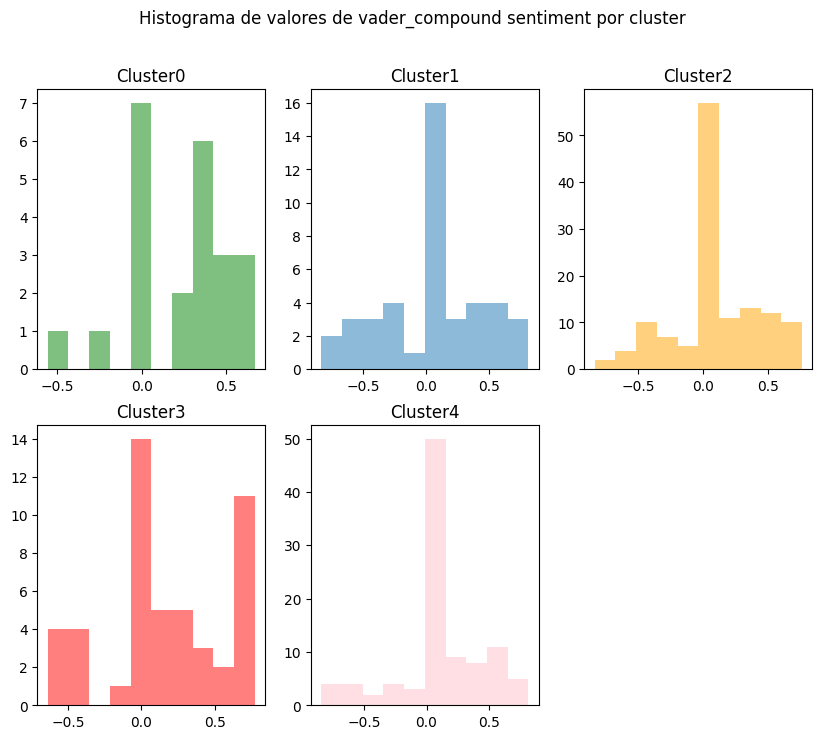

In [93]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,8))
plt.subplot(2, 3, 1)
plt.hist(x=df_cluster0['vader_compound_t'],label='cluster 0',alpha=0.5,color='green')
plt.title("Cluster0")

plt.subplot(2, 3, 2)
plt.hist(x=df_cluster1['vader_compound_t'],label='cluster 1',alpha=0.5)
plt.title("Cluster1")
plt.subplot(2, 3, 3)
plt.hist(x=df_cluster2['vader_compound_t'],label='cluster 2',alpha=0.5,color='orange')
plt.title("Cluster2")
plt.subplot(2, 3, 4)
plt.hist(x=df_cluster3['vader_compound_t'],label='cluster 3',alpha=0.5,color='red')
plt.title("Cluster3")
plt.subplot(2, 3, 5)
plt.hist(x=df_cluster4['vader_compound_t'],label='cluster 4',alpha=0.5,color='pink')
plt.title("Cluster4")
plt.suptitle("Histograma de valores de vader_compound sentiment por cluster")
plt.show()




In [19]:
score_cluster0=df_cluster0['vader_compound_t'].mean()
score_cluster1=df_cluster1['vader_compound_t'].mean()
score_cluster2=df_cluster2['vader_compound_t'].mean()
score_cluster3=df_cluster3['vader_compound_t'].mean()
score_cluster4=df_cluster4['vader_compound_t'].mean()


In [20]:
print(f'La puntuación del cluster 0 es {score_cluster0}')
print(f'La puntuación del cluster 1 es {score_cluster1}')
print(f'La puntuación del cluster 2 es {score_cluster2}')
print(f'La puntuación del cluster 3 es {score_cluster3}')
print(f'La puntuación del cluster 4 es {score_cluster4}')

La puntuación del cluster 0 es 0.23068260869565216
La puntuación del cluster 1 es 0.03286976744186046
La puntuación del cluster 2 es 0.07773206106870229
La puntuación del cluster 3 es 0.1646877551020408
La puntuación del cluster 4 es 0.08664


In [21]:
list_clusters=['cluster0','cluster1','cluster2','cluster3','cluster4']
list_scores=[score_cluster0,score_cluster1,score_cluster2,score_cluster3,score_cluster4]
scores=pd.DataFrame({'clusters':list_clusters,'scores':list_scores})
# guardo scores en csv
path_rdo='drive/My Drive/keepcoding/Tweets/resultados/'
scores.to_csv(path_rdo+'scores.csv',index=False)